# Unzip Folder

In [ ]:
import zipfile
import os

# Specify the name of the ZIP file
zip_file_name = "Alzheimer_s Dataset.zip"

# Specify the directory where you want to extract the contents
extracted_dir = "/content"

# Create the directory if it doesn't exist
os.makedirs(extracted_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
  zip_ref.extractall(extracted_dir)

# List the contents of the extracted directory
os.listdir(extracted_dir)

['Alzheimer_s Dataset']

# Import Libraries


In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
from os import listdir
import pathlib
from random import randint
import numpy as np
from numpy import asarray
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir, path

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import tensorflow_addons as tfa
from keras.utils import load_img,img_to_array
from keras.models import Sequential
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.layers import MaxPooling2D,Dropout,Dense,Input,Conv2D,Flatten,Conv2DTranspose
from keras.layers import GlobalAveragePooling2D,MaxPool2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import plot_model
import matplotlib.pyplot as plt


# Explore


In [ ]:
# Set the paths for train and test folders
train_folder = '/content/Alzheimer_s Dataset/train'
test_folder = '/content/Alzheimer_s Dataset/test'

In [ ]:
import os

def count_images_in_folder(folder_path):
    count = 0
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):
            count += 1
    return count

# Counting the number of images in each category for train set
print("Train set:")
for category in os.listdir(train_folder):
    category_path = os.path.join(train_folder, category)
    if os.path.isdir(category_path):
        num_images = count_images_in_folder(category_path)
        print(f"{category}: {num_images} images")

# Counting the number of images in each category for test set
print("\nTest set:")
for category in os.listdir(test_folder):
    category_path = os.path.join(test_folder, category)
    if os.path.isdir(category_path):
        num_images = count_images_in_folder(category_path)
        print(f"{category}: {num_images} images")


Train set:
MildDemented: 717 images
ModerateDemented: 52 images
NonDemented: 2560 images
VeryMildDemented: 1792 images

Test set:
MildDemented: 179 images
ModerateDemented: 12 images
NonDemented: 640 images
VeryMildDemented: 448 images


<PIL.Image.Image image mode=RGB size=176x208 at 0x1DB81EA2CD0>


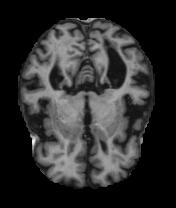

In [ ]:
photo = load_img('/content/Alzheimer_s Dataset/train/MildDemented/mildDem0.jpg')
print(photo)
photo

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Define an ImageDataGenerator for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Rescale pixel values to be between 0 and 1
    shear_range=0.2,          # Shear angle in counter-clockwise direction in degrees
    zoom_range=0.2,           # Range for random zoom
    horizontal_flip=True,     # Randomly flip inputs horizontally
    vertical_flip=True,       # Randomly flip inputs vertically
    validation_split=0.2      # Fraction of images reserved for validation (if validation_split is set)
)

DIM = (224, 224)  # Replace with your desired dimensions

# Use flow_from_directory for train data
train_generator = train_datagen.flow_from_directory(
    directory=train_folder,
    target_size=DIM,
    batch_size=6500,
    shuffle=False,
    subset='training'  # Specify 'training' to get the training split if using validation_split in ImageDataGenerator
)

# Fetch one batch of training data and labels
train_data, train_labels = train_generator.next()

# Print the shapes of the fetched batch
print("Shape of train_data:", train_data.shape)
print("Shape of train_labels:", train_labels.shape)


Found 4098 images belonging to 4 classes.
Shape of train_data: (4098, 224, 224, 3)
Shape of train_labels: (4098, 4)


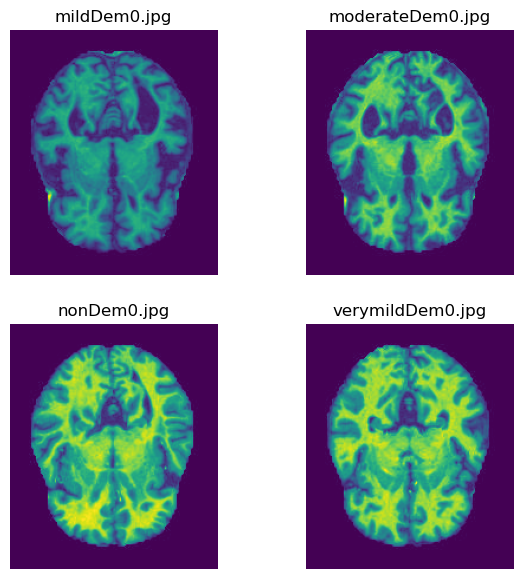

In [ ]:
plt.figure(figsize=(7, 7))
j = 0

for category in listdir(train_folder):
    category_path = path.join(train_folder, category)

    i = 0
    for image_file in listdir(category_path):
        if i == 1:
            break

        img_path = path.join(category_path, image_file)
        img = imread(img_path)

        ax = plt.subplot(2, 2, j + 1)
        plt.imshow(img)
        plt.title(image_file)
        plt.axis('off')

        j = j + 1
        i = i + 1

plt.show()

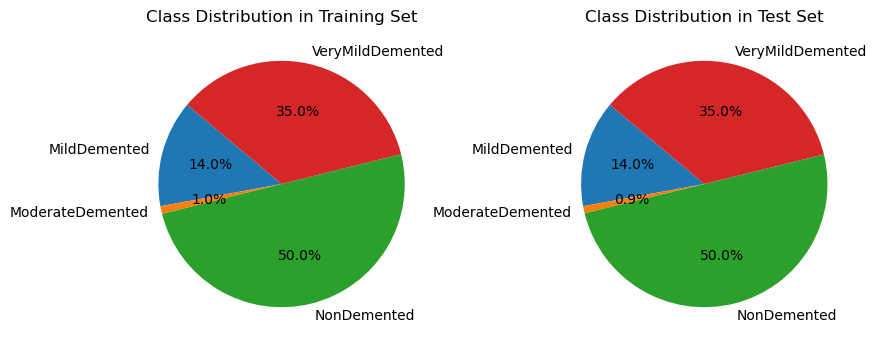

In [ ]:
# Function to count images in a folder
def count_images_in_folder(folder_path):
    count = 0
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.jpg') or file_name.endswith('.png'):
            count += 1
    return count

# Visualize class distribution in the training and test sets with pie charts side by side
plt.figure(figsize=(10, 4))  # Adjust the figure size here

# Plot for the training set
plt.subplot(1, 2, 1)
class_counts_train = [count_images_in_folder(os.path.join(train_folder, category)) for category in os.listdir(train_folder)]
plt.pie(class_counts_train, labels=os.listdir(train_folder), autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution in Training Set')

# Plot for the test set
plt.subplot(1, 2, 2)
class_counts_test = [count_images_in_folder(os.path.join(test_folder, category)) for category in os.listdir(test_folder)]
plt.pie(class_counts_test, labels=os.listdir(test_folder), autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution in Test Set')

plt.show()


# Preprocessing

In [ ]:
# Creating the image data generator for more samples
IMG_SIZE = 128
DIM = (IMG_SIZE, IMG_SIZE)

ZOOM = [.99, 1.01]
BRIGHT_RANGE = [0.8, 1.2]
HORZ_FLIP = True
FILL_MODE = "constant"
DATA_FORMAT = "channels_last"

train_generator = ImageDataGenerator(
    rescale=1./255,
    brightness_range=BRIGHT_RANGE,
    zoom_range=ZOOM,
    data_format=DATA_FORMAT,
    fill_mode=FILL_MODE,
    horizontal_flip=HORZ_FLIP
)

The purpose of this is to artificially increase the diversity of the training dataset. By applying random transformations to the images, the model becomes more robust and is less likely to overfit to the specific examples in the training set. This can lead to better generalization performance on unseen data.


In [ ]:
IMAGE_SIZE = [176,208]               # input image dimensions                                              (176,208)
BATCH_SIZE = 5000
test_split_percent = .1       # % of total data for testing                                         .1
validation_split_percent = .2 # % of total data for validation                                      .2
zoom = [.99,1.01]             # zoom range (for a fixed zoom put the same value in both parameters)[.99,1.01]
bright_range = [.8,1.2]       # brightness range                                                    [.8,1.2]
layers_unlocked = True        # unlock the imported pre-training layers?                            False
lr = 0.01                   # learning rate for optimizer                                         0.0001
batch = 20                    # batch size for model fitting                                        20
EPOCHS = 50                     # number of epochs to run                                             50
#momentum = .9                 # momentum of SGD                                                     .9

In [ ]:
# introduced zoom, blew up the image of the brain itself, and brightness range to adjust for different brightness
train_dr = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,fill_mode='constant',cval=0,
                                                           brightness_range=bright_range,zoom_range=zoom,
                                                           data_format='channels_last',zca_whitening=False)

train_data_gen = train_dr.flow_from_directory(directory=train_folder,target_size=IMAGE_SIZE,
                                              batch_size=BATCH_SIZE)

# Change to zoom = [1,1] to use normal test data
test_dr = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,fill_mode='constant',cval=0,zoom_range=[1,1],
                                                          data_format='channels_last')
test_data_gen = test_dr.flow_from_directory(directory=test_folder,target_size=IMAGE_SIZE,batch_size=BATCH_SIZE,
                                           shuffle = False) # test data should not be shuffle

Found 5121 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [ ]:
train_data,train_labels =  train_data_gen.next()
test_data,test_labels = test_data_gen.next()

In [ ]:
# cocatenate arrays, combining all data
total_data = np.concatenate((train_data,test_data))
total_labels = np.concatenate((train_labels,test_labels))
print(total_data.shape)
print(total_labels.shape)

(6279, 176, 208, 3)
(6279, 4)


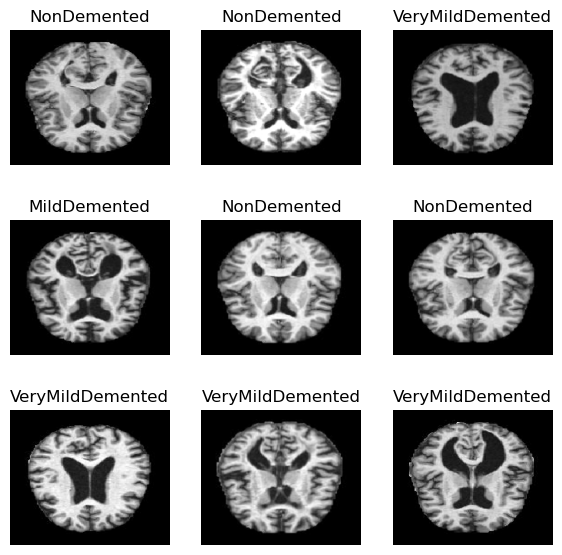

In [ ]:
CLASSES = list(train_data_gen.class_indices.keys())

def show_images(generator, y_pred=None):
    # get image labels
    labels = dict(zip(range(len(CLASSES)), CLASSES))

    # get a batch of images
    x, y = generator.next()

    # display a grid of 9 images
    plt.figure(figsize=(7, 7))
    if y_pred is None:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            idx = randint(0, x.shape[0] - 1)
            plt.imshow(x[idx])
            plt.axis("off")
            plt.title("{}".format(labels[np.argmax(y[idx])]))
    else:
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(x[i])
            plt.axis("off")
            plt.title("Actual: {} \nPredicted: {}".format(labels[np.argmax(y[i])], labels[y_pred[i]]))

# Display Train Images
show_images(train_data_gen)


In [ ]:
initial_split = test_split_percent+validation_split_percent
test_val_split = test_split_percent/initial_split

# split into training and (test + validation)
train_data, test_val_data, train_labels, test_val_labels = train_test_split(total_data,total_labels,
                                                                            test_size=initial_split)

# split (test + validation) into test and validation sets
test_data, val_data, test_labels, val_labels = train_test_split(test_val_data,test_val_labels,
                                                                test_size=test_val_split)

print('train: ',train_data.shape)
print('validation',val_data.shape)
print('test',test_data.shape)

train:  (4395, 176, 208, 3)
validation (628, 176, 208, 3)
test (1256, 176, 208, 3)


In [ ]:
print(train_data.shape)
print(train_labels.shape)
print(val_data.shape)
print(val_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(4395, 176, 208, 3)
(4395, 4)
(628, 176, 208, 3)
(628, 4)
(1256, 176, 208, 3)
(1256, 4)


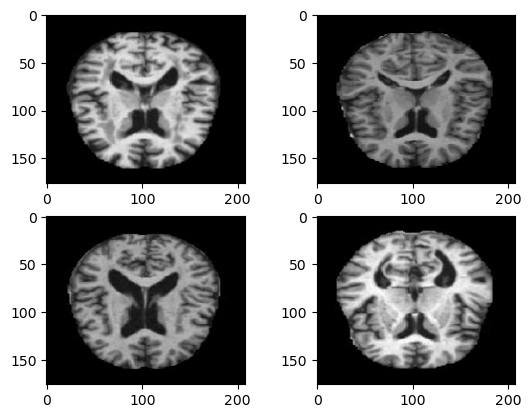

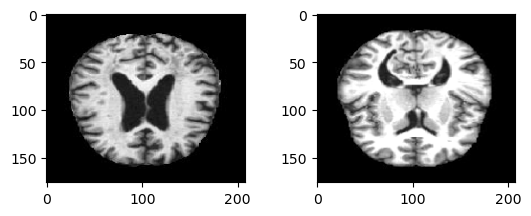

In [ ]:
# check some images
plt.subplot(221)
plt.imshow(train_data[1,:,:,:])
plt.subplot(222)
plt.imshow(train_data[2,:,:,:])
plt.subplot(223)
plt.imshow(val_data[3,:,:,:])
plt.subplot(224)
plt.imshow(val_data[4,:,:,:])
plt.show()
plt.subplot(221)
plt.imshow(test_data[5,:,:,:])
plt.subplot(222)
plt.imshow(test_data[154,:,:,:])

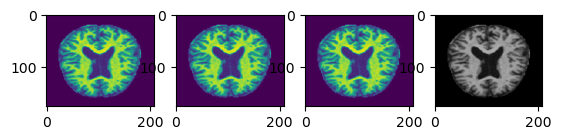

In [ ]:
# check image channels
plt.subplot(141)
plt.imshow(train_data[3,:,:,0])
plt.subplot(142)
plt.imshow(train_data[3,:,:,1])
plt.subplot(143)
plt.imshow(train_data[3,:,:,2])
plt.subplot(144)
plt.imshow(train_data[3,:,:,:])

# Customized CNN

In [ ]:
def conv_block(filters):
    block = tf.keras.Sequential([
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', padding='same'),
        #tf.keras.layers.SeparableConv2D(filters, 3, activation='relu', strides=2, padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPool2D()
    ])

    return block

In [ ]:
def dense_block(units, dropout_rate):
    block = tf.keras.Sequential([
        tf.keras.layers.Dense(units, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(dropout_rate)
    ])

    return block

In [ ]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(*IMAGE_SIZE, 3)),

        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        #tf.keras.layers.Conv2D(16, 3, activation='relu', padding='same'),
        tf.keras.layers.MaxPool2D(),

        conv_block(32),
        conv_block(64),

        conv_block(128),
        tf.keras.layers.Dropout(0.2),

        conv_block(256),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Flatten(),
        dense_block(512, 0.7),
        dense_block(128, 0.5),
        dense_block(64, 0.3),

        tf.keras.layers.Dense(4, activation='softmax')
    ])

    return model

In [ ]:
strategy = tf.distribute.MirroredStrategy()
with strategy.scope():
    model = build_model()

    METRICS = [tf.keras.metrics.BinaryAccuracy(name='accuracy'),tf.keras.metrics.Precision(name='precision'),
               tf.keras.metrics.Recall(name='recall'),tf.keras.metrics.AUC(name='auc')]


    model.compile(
        optimizer='adam',
        loss=tf.losses.CategoricalCrossentropy(),
        metrics=METRICS
    )

In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

#checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("alzheimer_model.h5", save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [ ]:
model_history = model.fit(train_data,train_labels,validation_data=(val_data,val_labels),
                             epochs=EPOCHS,batch_size=batch, shuffle=True)


Epoch 1/50
220/220 [==============================] - 331s 1s/step - loss: 1.5500 - accuracy: 0.7173 - precision: 0.3989 - recall: 0.2578 - auc: 0.6368 - val_loss: 1.1272 - val_accuracy: 0.7500 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.7487
Epoch 2/50
220/220 [==============================] - 335s 2s/step - loss: 1.1333 - accuracy: 0.7658 - precision: 0.5498 - recall: 0.3481 - auc: 0.7724 - val_loss: 1.0984 - val_accuracy: 0.7420 - val_precision: 0.4841 - val_recall: 0.4841 - val_auc: 0.7961
Epoch 3/50
220/220 [==============================] - 314s 1s/step - loss: 1.0344 - accuracy: 0.7749 - precision: 0.5797 - recall: 0.3615 - auc: 0.8006 - val_loss: 1.2105 - val_accuracy: 0.7767 - val_precision: 0.5556 - val_recall: 0.5334 - val_auc: 0.8218
Epoch 4/50
220/220 [==============================] - 315s 1s/step - loss: 0.9681 - accuracy: 0.7887 - precision: 0.6323 - recall: 0.3702 - auc: 0.8213 - val_loss: 1.0737 - val_accuracy: 0.7623 - val_precision: 0.8780 - v

In [ ]:
pred_labels = model.predict(test_data)

40/40 [==============================] - 22s 542ms/step


In [ ]:
_ = model.evaluate(test_data, test_labels)

40/40 [==============================] - 24s 597ms/step - loss: 0.2417 - accuracy: 0.9638 - precision: 0.9310 - recall: 0.9236 - auc: 0.9863


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 176, 208, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 176, 208, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2  (None, 88, 104, 16)       0         
 D)                                                              
                                                                 
 sequential (Sequential)     (None, 44, 52, 32)        2160      
                                                                 
 sequential_1 (Sequential)   (None, 22, 26, 64)        7392      
                                                                 
 sequential_2 (Sequential)   (None, 11, 13, 128)       27072     
                                                      

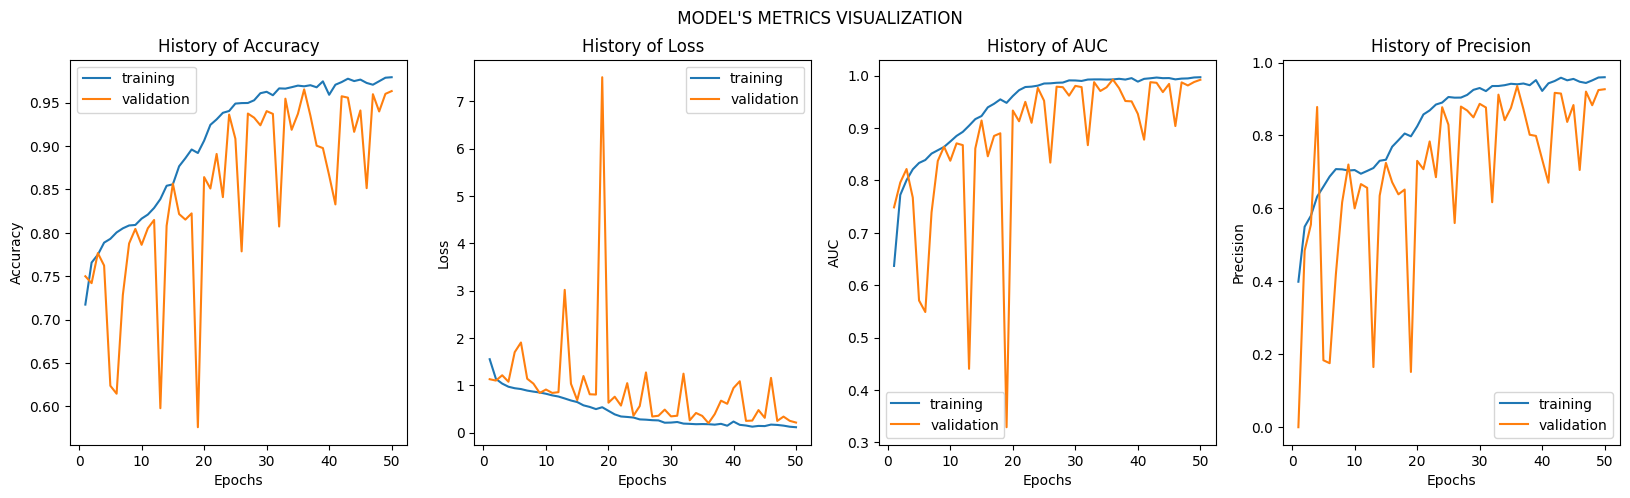

In [ ]:
#%% PLOTTING RESULTS (Train vs Validation FOLDER 1)

def Train_Val_Plot(acc,val_acc,loss,val_loss,auc,val_auc,precision,val_precision):

    fig, (ax1, ax2,ax3,ax4) = plt.subplots(1,4, figsize= (20,5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])

    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])

    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])
    plt.show()


Train_Val_Plot(model_history.history['accuracy'],model_history.history['val_accuracy'],
               model_history.history['loss'],model_history.history['val_loss'],
               model_history.history['auc'],model_history.history['val_auc'],
              model_history.history['precision'],model_history.history['val_precision'])

In [ ]:
CLASSES = ['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
def roundoff(arr):
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_labels:
    labels = roundoff(labels)

print(classification_report(test_labels, pred_labels, target_names=CLASSES))

                  precision    recall  f1-score   support

    MildDemented       0.92      0.88      0.90       186
ModerateDemented       0.90      1.00      0.95         9
     NonDemented       0.93      0.97      0.95       611
VeryMildDemented       0.93      0.88      0.90       450

       micro avg       0.93      0.93      0.93      1256
       macro avg       0.92      0.93      0.92      1256
    weighted avg       0.93      0.93      0.92      1256
     samples avg       0.93      0.93      0.93      1256



In [ ]:
from sklearn.metrics import classification_report


# ResNet50

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [ ]:

train_datagen = ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2,
                                   rotation_range=5,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255,
                                  validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_dataset = train_datagen.flow_from_directory(directory='/content/Alzheimer_s Dataset/train',
                                                   target_size=(224, 224),
                                                   class_mode='categorical',
                                                   subset='training',
                                                   batch_size=32)

valid_dataset = valid_datagen.flow_from_directory(directory='/content/Alzheimer_s Dataset/train',
                                                  target_size=(224, 224),
                                                  class_mode='categorical',
                                                  subset='validation',
                                                  batch_size=32)

test_dataset = test_datagen.flow_from_directory(directory='/content/Alzheimer_s Dataset/test',
                                                target_size=(224, 224),
                                                class_mode='categorical',
                                                batch_size=32)


Found 4098 images belonging to 4 classes.
Found 1023 images belonging to 4 classes.
Found 1279 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50
base_model = ResNet50(input_shape=(224, 224, 3),
                      include_top=False,
                      weights="imagenet")

In [ ]:
# Freezing Layers

for layer in base_model.layers:
    layer.trainable = False

model = Sequential()
model.add(base_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(64, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(32, kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:

# Model Summary

model.summary()

def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2 * (precision * recall) / (precision + recall + K.epsilon())
    return f1_val

METRICS = [
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc'),
    f1_score,
]

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 2048)        0         
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 batch_normalization_6 (Bat  (None, 100352)            401408    
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 64)                6422592   
                                                                 
 batch_normalization_7 (Bat  (None, 64)                256       
 chNormalization)                                     

In [ ]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 ** (epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)  # when I run it for 50 epochs

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=METRICS)

history = model.fit(train_dataset,
                    validation_data=valid_dataset,
                    epochs=17,
                    verbose=1,
                    callbacks=[lr_scheduler])

def Train_Val_Plot(acc, val_acc, loss, val_loss, auc, val_auc, precision, val_precision, f1, val_f1):

    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(20, 5))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])

    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])

    ax3.plot(range(1, len(auc) + 1), auc)
    ax3.plot(range(1, len(val_auc) + 1), val_auc)
    ax3.set_title('History of AUC')
    ax3.set_xlabel('Epochs')
    ax3.set_ylabel('AUC')
    ax3.legend(['training', 'validation'])

    ax4.plot(range(1, len(precision) + 1), precision)
    ax4.plot(range(1, len(val_precision) + 1), val_precision)
    ax4.set_title('History of Precision')
    ax4.set_xlabel('Epochs')
    ax4.set_ylabel('Precision')
    ax4.legend(['training', 'validation'])

    ax5.plot(range(1, len(f1) + 1), f1)
    ax5.plot(range(1, len(val_f1) + 1), val_f1)
    ax5.set_title('History of F1-score')
    ax5.set_xlabel('Epochs')
    ax5.set_ylabel('F1 score')
    ax5.legend(['training', 'validation'])

    plt.show()


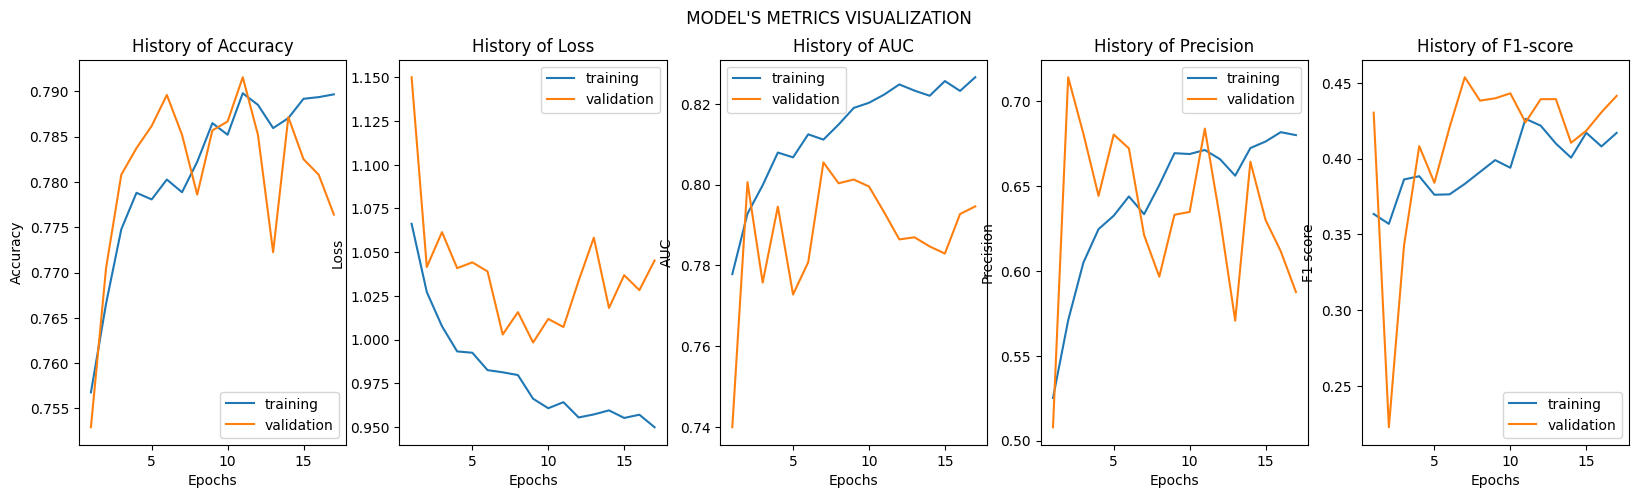

40/40 [==============================] - 220s 6s/step - loss: 0.9678 - accuracy: 0.7834 - precision: 0.6321 - recall: 0.3198 - auc: 0.8152 - f1_score: 0.4217
Accuracy =  0.7834245562553406
Precision =  0.6321483850479126
Recall =  0.3197810649871826
AUC =  0.8151711225509644
F1_score =  0.42172884941101074


In [ ]:
Train_Val_Plot(history.history['accuracy'], history.history['val_accuracy'],
               history.history['loss'], history.history['val_loss'],
               history.history['auc'], history.history['val_auc'],
               history.history['precision'], history.history['val_precision'],
               history.history['f1_score'], history.history['val_f1_score'])

scores = model.evaluate_generator(test_dataset, steps=len(test_dataset), verbose=1)


print("Accuracy = ", scores[1])
print("Precision = ", scores[2])
print("Recall = ", scores[3])
print("AUC = ", scores[4])
print("F1_score = ", scores[5])



In [ ]:
kpred = model.predict(test_dataset)

pred = kpred.tolist()
predictions = []
for i in pred:
    predictions.append(i.index(max(i)))

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(classification_report(test_dataset.classes, predictions))


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
40/40 [==============================] - 224s 6s/step
              precision    recall  f1-score   support

           0       0.33      0.01      0.01       179
           1       0.00      0.00      0.00        12
           2       0.51      0.68      0.58       640
           3       0.39      0.37      0.38       448

    accuracy                           0.47      1279
   macro avg       0.31      0.26      0.24      1279
weighted avg       0.44      0.47      0.42      1279



In [ ]:
#Set up the environment and upload the data
from sklearn.preprocessing import StandardScaler
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from skimage.transform import resize
import pandas as pd
from matplotlib.image import imread
from skimage.io import imread_collection
from PIL import Image
import seaborn as sns
from sklearn import decomposition, preprocessing, svm
import sklearn.metrics as metrics #confusion_matrix, accuracy_score
from time import sleep
from tqdm.notebook import tqdm
import os
sns.set()

In [ ]:
from keras.callbacks import LearningRateScheduler, EarlyStopping

# INCEPTIONNETV3

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
from os import listdir
import pathlib
from random import randint
import numpy as np
from numpy import asarray
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
import tensorflow_addons as tfa
from keras.utils import load_img,img_to_array
from keras.models import Sequential
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.layers import MaxPooling2D,Dropout,Dense,Input,Conv2D,Flatten,Conv2DTranspose
from keras.layers import GlobalAveragePooling2D,MaxPool2D,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import plot_model

In [ ]:
folder = r'C:\Users\user\Desktop\Year 3\Deep neural networks\Lab\Alzheimer_s Datasetall'

folder_path = pathlib.Path(folder)

In [ ]:
for file in listdir(folder):
    print(file)

MildDemented
ModerateDemented
NonDemented
VeryMildDemented


In [ ]:
# counting the number of images in each category
for file in listdir(folder):
    i =0
    for image in listdir(folder + '/'+file):
        i = i +1
    print(file , i)

MildDemented 896
ModerateDemented 64
NonDemented 3200
VeryMildDemented 2240


In [ ]:
# Creating the image datagenerator to have more samples
IMG_SIZE = 128
DIM = (IMG_SIZE, IMG_SIZE)

ZOOM = [.99, 1.01]
BRIGHT_RANGE = [0.8, 1.2]
HORZ_FLIP = True
FILL_MODE = "constant"
DATA_FORMAT = "channels_last"

In [ ]:
train_generator = ImageDataGenerator(rescale = 1./255, brightness_range=BRIGHT_RANGE, zoom_range=ZOOM,
                                     data_format=DATA_FORMAT, fill_mode=FILL_MODE, horizontal_flip=HORZ_FLIP)
train_data_gen = train_generator.flow_from_directory(directory=folder, target_size=DIM, batch_size=6500, shuffle=False)

Found 6400 images belonging to 4 classes.


In [ ]:
train_data, train_labels = train_data_gen.next()

In [ ]:
train_data.shape, train_labels.shape

((6400, 128, 128, 3), (6400, 4))

In [ ]:
sm = SMOTE(random_state=42)

train_data, train_labels = sm.fit_resample(train_data.reshape(-1, IMG_SIZE * IMG_SIZE * 3), train_labels)

print(train_data.shape, train_labels.shape)

(12800, 49152) (12800, 4)


In [ ]:
train_data = train_data.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
print(train_data.shape, train_labels.shape)

(12800, 128, 128, 3) (12800, 4)


In [ ]:
train_data, test_data, train_labels,test_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)

train_data, val_data, train_labels,val_labels = train_test_split(train_data, train_labels, test_size = 0.2, random_state=42)

In [ ]:
inception = InceptionV3(input_shape=(128,128,3),include_top=False,weights ='imagenet')

87910968/87910968 [==============================] - 25s 0us/step


In [ ]:
for layer in inception.layers:
    layer.trainable = False

In [ ]:
inception_model = Sequential([
        inception,
        Dropout(0.5),
        GlobalAveragePooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        BatchNormalization(),
        Dense(4, activation='softmax')
    ], name = "inception_cnn_model")

In [ ]:
METRICS = [tf.keras.metrics.CategoricalAccuracy(name='acc'),
           tf.keras.metrics.AUC(name='auc'),
           tfa.metrics.F1Score(num_classes=4)]



In [ ]:
inception_model.compile(optimizer='rmsprop',
                              loss=tf.losses.CategoricalCrossentropy(),
                              metrics=METRICS)

inception_model.summary()

Model: "inception_cnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 dropout_3 (Dropout)         (None, 2, 2, 2048)        0         
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_97 (Ba  (None, 2048)              8192      
 tchNormalization)                                               
                                                                 
 dense_4 (Dense)             (None, 512)       

In [ ]:
INCEPT_CALLBACKS = [
    ModelCheckpoint(filepath='incpt_model_checkpoint.h5', save_best_only=True),
    EarlyStopping(patience=3)
]

In [ ]:
incept_history = inception_model.fit(train_data, train_labels, validation_data=(val_data, val_labels), epochs=50,callbacks= INCEPT_CALLBACKS)


Epoch 1/50
256/256 [==============================] - 62s 206ms/step - loss: 1.4454 - acc: 0.3800 - auc: 0.6515 - f1_score: 0.3772 - val_loss: 0.8608 - val_acc: 0.6045 - val_auc: 0.8635 - val_f1_score: 0.5764
Epoch 2/50
256/256 [==============================] - 48s 187ms/step - loss: 0.9898 - acc: 0.5459 - auc: 0.8206 - f1_score: 0.5383 - val_loss: 0.7562 - val_acc: 0.6465 - val_auc: 0.8921 - val_f1_score: 0.6195
Epoch 3/50
256/256 [==============================] - 47s 183ms/step - loss: 0.8747 - acc: 0.5951 - auc: 0.8603 - f1_score: 0.5805 - val_loss: 0.6779 - val_acc: 0.6763 - val_auc: 0.9127 - val_f1_score: 0.6645
Epoch 4/50
256/256 [==============================] - 48s 187ms/step - loss: 0.7983 - acc: 0.6337 - auc: 0.8824 - f1_score: 0.6254 - val_loss: 0.6375 - val_acc: 0.6885 - val_auc: 0.9220 - val_f1_score: 0.6729
Epoch 5/50
256/256 [==============================] - 48s 188ms/step - loss: 0.7780 - acc: 0.6516 - auc: 0.8905 - f1_score: 0.6455 - val_loss: 0.6234 - val_acc: 0.6

In [ ]:
incept_test_scores = inception_model.evaluate(test_data, test_labels)
print("Testing Accuracy: %.2f%%"%(incept_test_scores[1] * 100))

80/80 [==============================] - 11s 142ms/step - loss: 0.3806 - acc: 0.8418 - auc: 0.9733 - f1_score: 0.8382
Testing Accuracy: 84.18%


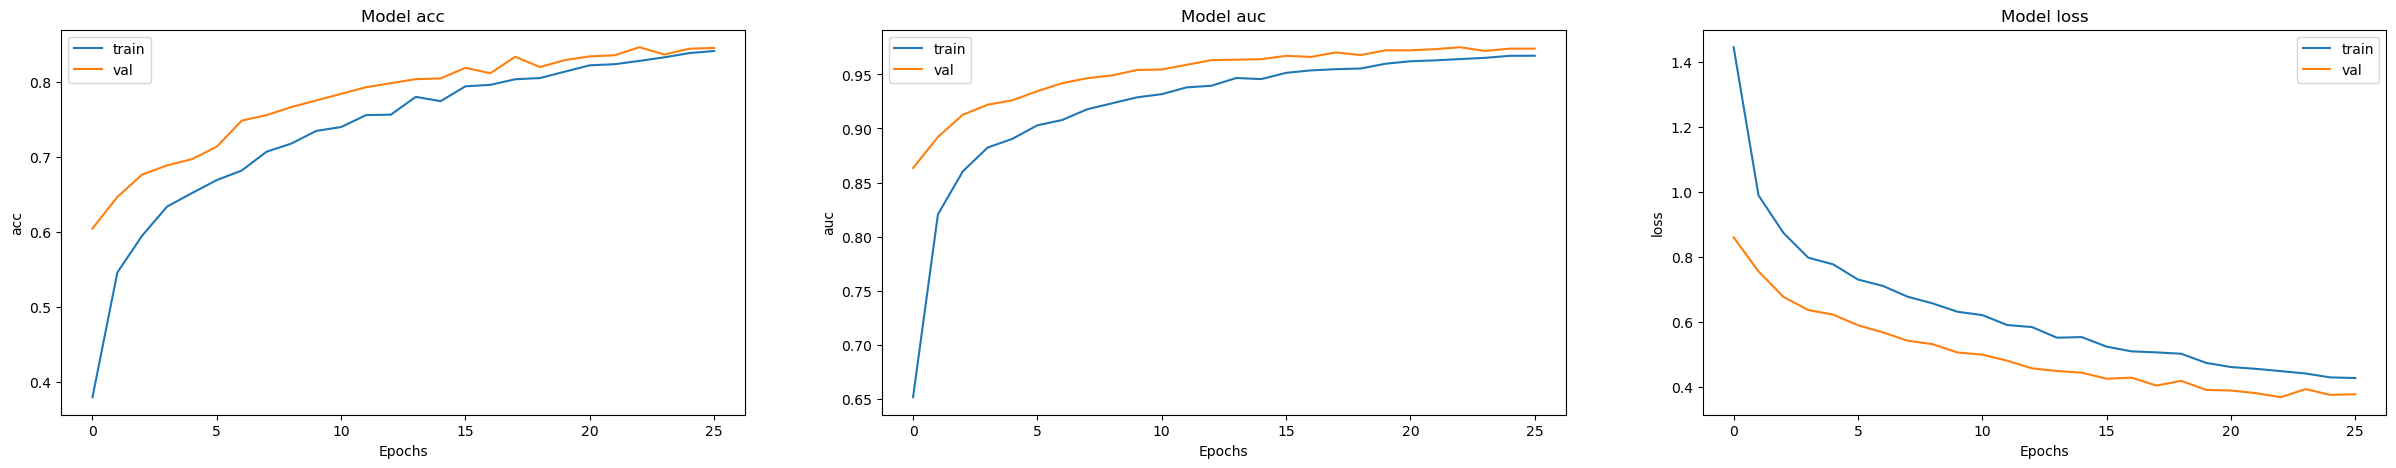

In [ ]:
#Plotting the trend of the metrics during training

fig, ax = plt.subplots(1, 3, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["acc", "auc", "loss"]):
    ax[i].plot(incept_history.history[metric])
    ax[i].plot(incept_history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [ ]:
pred_labels = inception_model.predict(test_data)

80/80 [==============================] - 11s 115ms/step


In [ ]:
from sklearn.metrics import classification_report
CLASSES = ['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
def roundoff(arr):
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_labels:
    labels = roundoff(labels)

print(classification_report(test_labels, pred_labels, target_names=CLASSES))

                  precision    recall  f1-score   support

    MildDemented       0.84      0.95      0.89       639
ModerateDemented       1.00      1.00      1.00       635
     NonDemented       0.75      0.78      0.77       662
VeryMildDemented       0.78      0.64      0.70       624

       micro avg       0.84      0.84      0.84      2560
       macro avg       0.84      0.84      0.84      2560
    weighted avg       0.84      0.84      0.84      2560
     samples avg       0.84      0.84      0.84      2560



# resnet101v2

In [ ]:
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, GlobalMaxPooling2D, Flatten, BatchNormalization, Dense

# Load the pre-trained ResNet101V2 model without the top (fully connected) layers
resnet101v2 = ResNet101V2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the pre-trained layers
for layer in resnet101v2.layers:
    layer.trainable = False

# Create a Sequential model and add the ResNet101V2 base
resnet_model = Sequential()
resnet_model.add(resnet101v2)

# Add custom layers on top of the ResNet101V2 base
resnet_model.add(Dropout(0.5))
resnet_model.add(GlobalMaxPooling2D())  # Change to GlobalMaxPooling2D
resnet_model.add(Flatten())
resnet_model.add(BatchNormalization())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(BatchNormalization())
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(64, activation='relu'))
resnet_model.add(Dropout(0.5))
resnet_model.add(BatchNormalization())
resnet_model.add(Dense(4, activation='softmax'))

# Compile the model with Adam optimizer
resnet_model.compile(optimizer='adam',
                     loss=tf.losses.CategoricalCrossentropy(),
                     metrics=METRICS)


171317808/171317808 [==============================] - 48s 0us/step


In [ ]:

# Display the summary of the ResNet101V2 transfer learning model
resnet_model.summary()

# Define callbacks
RESNET_CALLBACKS = [
    ModelCheckpoint(filepath='resnet_model_checkpoint.h5', save_best_only=True),
    EarlyStopping(patience=3)
]



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101v2 (Functional)    (None, 4, 4, 2048)        42626560  
                                                                 
 dropout_8 (Dropout)         (None, 4, 4, 2048)        0         
                                                                 
 global_max_pooling2d (Glob  (None, 2048)              0         
 alMaxPooling2D)                                                 
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 batch_normalization_102 (B  (None, 2048)              8192      
 atchNormalization)                                              
                                                                 
 dense_9 (Dense)             (None, 512)              

In [ ]:
# Train the model
resnet_history = resnet_model.fit(train_data, train_labels,
                                  validation_data=(val_data, val_labels),
                                  epochs=50, callbacks=RESNET_CALLBACKS)


Epoch 1/50
256/256 [==============================] - 2047s 8s/step - loss: 1.5005 - acc: 0.4859 - auc: 0.7530 - f1_score: 0.4846 - val_loss: 0.9349 - val_acc: 0.5586 - val_auc: 0.8354 - val_f1_score: 0.5330
Epoch 2/50
256/256 [==============================] - 158s 618ms/step - loss: 1.0064 - acc: 0.5389 - auc: 0.8131 - f1_score: 0.5318 - val_loss: 0.8514 - val_acc: 0.5967 - val_auc: 0.8608 - val_f1_score: 0.5625
Epoch 3/50
256/256 [==============================] - 163s 636ms/step - loss: 0.8496 - acc: 0.6018 - auc: 0.8634 - f1_score: 0.5956 - val_loss: 0.7588 - val_acc: 0.6528 - val_auc: 0.8926 - val_f1_score: 0.6247
Epoch 4/50
256/256 [==============================] - 827s 3s/step - loss: 0.7735 - acc: 0.6426 - auc: 0.8891 - f1_score: 0.6366 - val_loss: 0.6929 - val_acc: 0.6709 - val_auc: 0.9097 - val_f1_score: 0.6431
Epoch 5/50
256/256 [==============================] - 147s 576ms/step - loss: 0.7258 - acc: 0.6721 - auc: 0.9034 - f1_score: 0.6682 - val_loss: 0.6311 - val_acc: 0.7

In [ ]:
resnet_test_scores = resnet_model.evaluate(test_data, test_labels)
print("Testing Accuracy: %.2f%%"%(incept_test_scores[1] * 100))

80/80 [==============================] - 52s 644ms/step - loss: 0.5267 - acc: 0.7695 - auc: 0.9495 - f1_score: 0.7674
Testing Accuracy: 84.18%


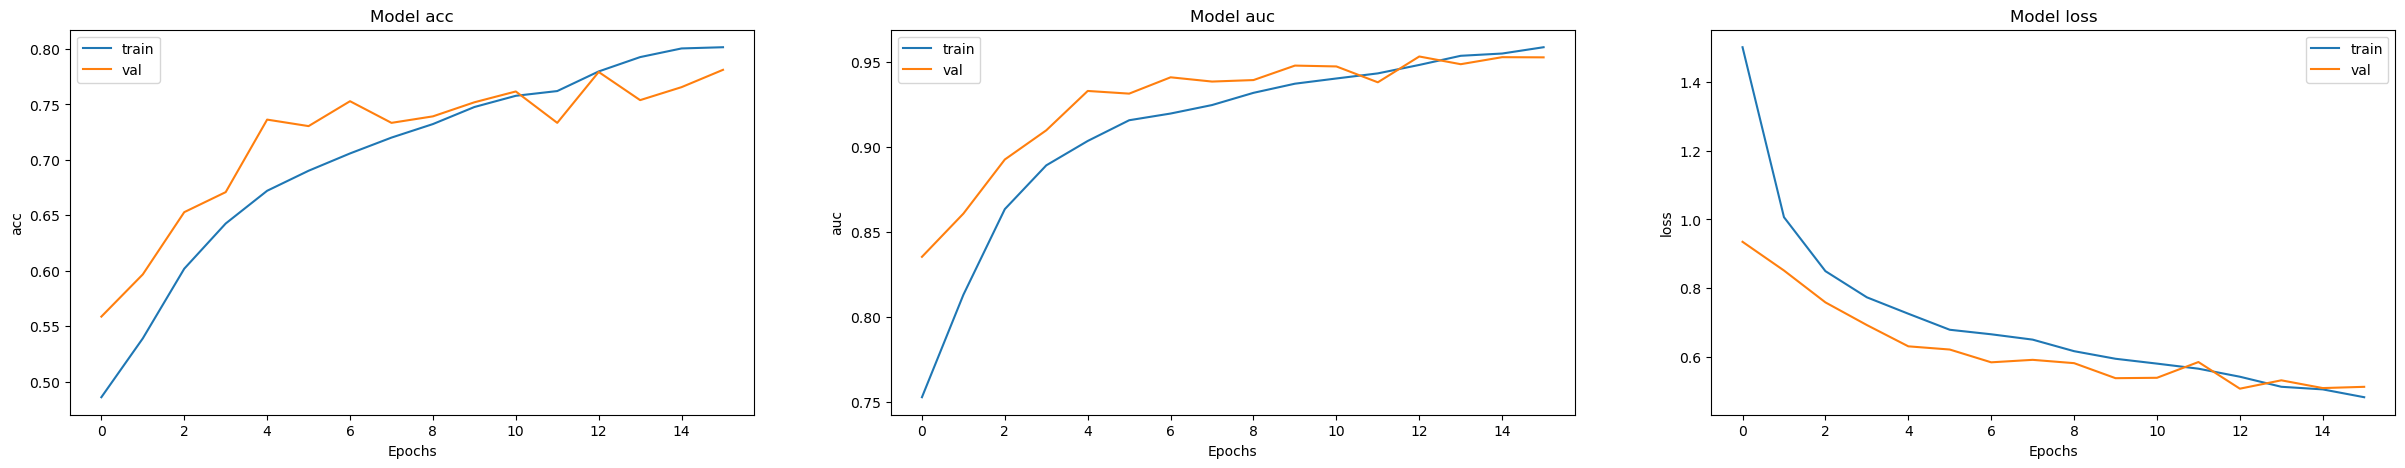

In [ ]:
#Plotting the trend of the metrics during training

fig, ax = plt.subplots(1, 3, figsize = (30, 5))
ax = ax.ravel()

for i, metric in enumerate(["acc", "auc", "loss"]):
    ax[i].plot(resnet_history.history[metric])
    ax[i].plot(resnet_history.history["val_" + metric])
    ax[i].set_title("Model {}".format(metric))
    ax[i].set_xlabel("Epochs")
    ax[i].set_ylabel(metric)
    ax[i].legend(["train", "val"])

In [ ]:
pred_labels = resnet_model.predict(test_data)

80/80 [==============================] - 55s 650ms/step


In [ ]:
from sklearn.metrics import classification_report
CLASSES = ['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
def roundoff(arr):
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_labels:
    labels = roundoff(labels)

print(classification_report(test_labels, pred_labels, target_names=CLASSES))

                  precision    recall  f1-score   support

    MildDemented       0.90      0.75      0.82       639
ModerateDemented       0.97      1.00      0.99       635
     NonDemented       0.89      0.44      0.59       662
VeryMildDemented       0.54      0.90      0.67       624

       micro avg       0.77      0.77      0.77      2560
       macro avg       0.82      0.77      0.77      2560
    weighted avg       0.83      0.77      0.77      2560
     samples avg       0.77      0.77      0.77      2560

